# 숙제1

In [50]:
import pandas as pd #시리즈, 데이터프레임
import numpy as np #행렬연산
import matplotlib.pyplot as plt #데이터시각화
import matplotlib 
from sklearn.preprocessing import StandardScaler #SCALING
from sklearn.model_selection import train_test_split #데이터분할 train, test
from statsmodels.api import Logit #로지스틱 회귀
from sklearn.metrics import accuracy_score #평가함수
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

In [3]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
df_raw.isnull().sum(axis=0) #결측치 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

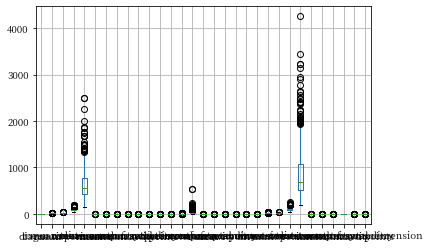

In [7]:
df_raw.boxplot()

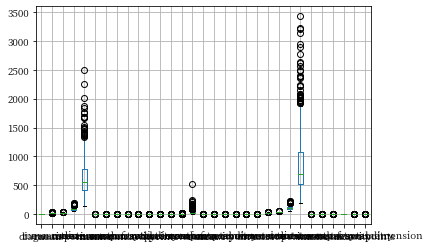

In [19]:
df_raw = df_raw[df_raw["worst area"]<4000] #이상치 제거
df_raw.boxplot()

In [20]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["diagnosis"] #목표변수 설정


df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train 0.4 test 0.3 validation 0.3으로 분할

print(df_train_x.shape)
print(df_train_y.shape)

print(df_test_x.shape)
print(df_test_y.shape)

print(df_validation_x.shape)
print(df_validation_y.shape)

(227, 30)
(227,)
(171, 30)
(171,)
(170, 30)
(170,)


In [24]:
tree_uncustomized = DecisionTreeClassifier(random_state =1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on Validation set: {:.3f}".format(tree_uncustomized.score(df_validation_x, df_validation_y)))
tree_uncustomized #과적합 되어 있다.

Socor on training set: 1.000
Score on Validation set: 0.906


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [25]:
train_accuracy = []; validation_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validationAccuracy"] = validation_accuracy 

In [26]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,validationAccuracy
0,1,0.943,0.882
1,2,0.960,0.924
2,3,0.987,0.906
3,4,1.000,0.906
4,5,1.000,0.906
5,6,1.000,0.906
6,7,1.000,0.906
7,8,1.000,0.906
8,9,1.000,0.906
9,10,1.000,0.906


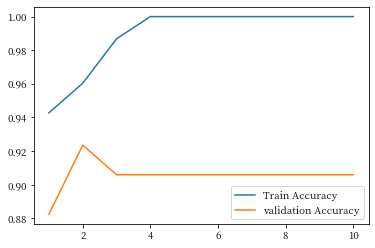

In [28]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.legend()
#최대 깊이 2로 결정

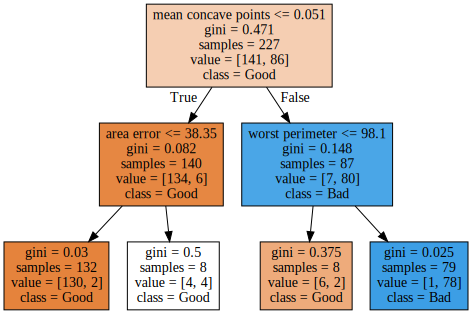

In [29]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 2, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

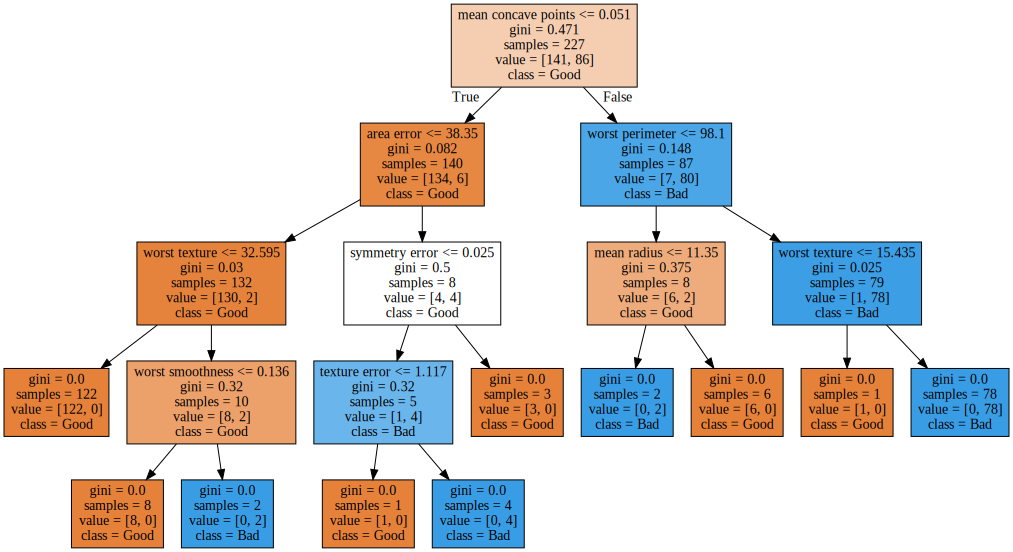

In [30]:
tree_high = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [31]:
train_accuracy = []; validation_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth =4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["validationAccuracy"] = validation_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,validationAccuracy
0,10,0.974,0.918
1,20,0.965,0.924
2,30,0.965,0.924
3,40,0.965,0.924
4,50,0.965,0.924
5,60,0.965,0.924
6,70,0.965,0.924
7,80,0.960,0.924
8,90,0.943,0.882
9,100,0.943,0.882


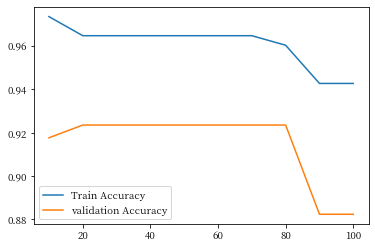

In [34]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.legend()
#split 20과 80 선택

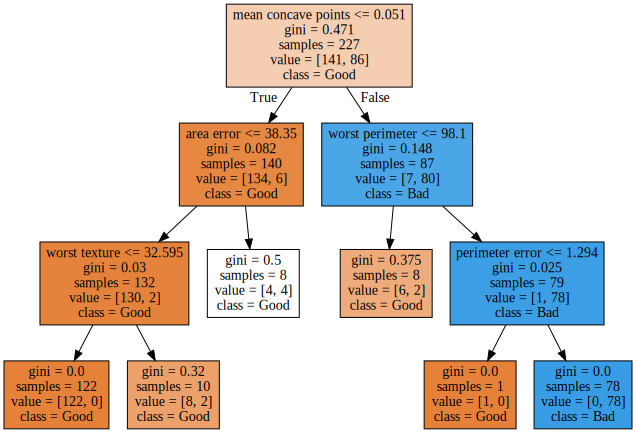

In [33]:
tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

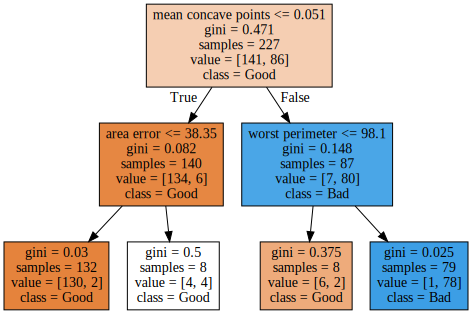

In [36]:
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=80, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#최종적으로 20으로 결정

In [37]:
train_accuracy = []; validation_accuracy =[]
para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=20, max_depth =2, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["validationAccuracy"] = validation_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,validationAccuracy
0,2,0.960,0.924
1,4,0.960,0.924
2,6,0.960,0.924
3,8,0.960,0.924
4,10,0.952,0.918
5,12,0.943,0.924
6,14,0.943,0.882
7,16,0.943,0.882
8,18,0.943,0.882
9,20,0.943,0.882


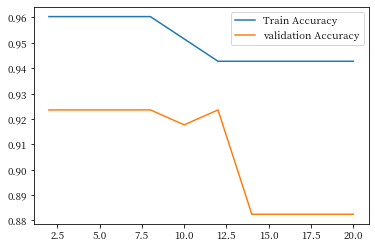

In [38]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle="-", label = "validation Accuracy")
plt.legend()
#leaf 8과 12로 결정

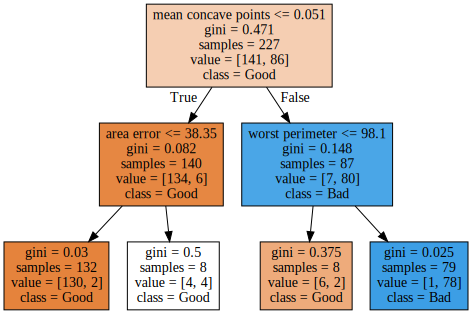

In [39]:
tree_low = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, min_samples_leaf = 8, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

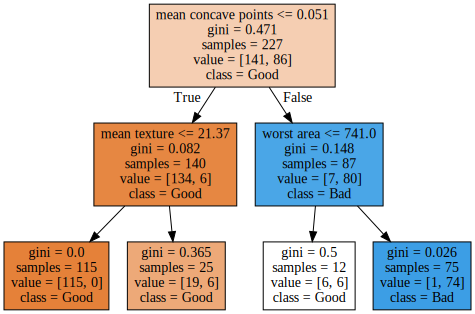

In [40]:
tree_high = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, min_samples_leaf=12, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))
#최종적을 12로 결정

In [41]:
tree_final = DecisionTreeClassifier(max_depth = 2, min_samples_split=20, min_samples_leaf = 12, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

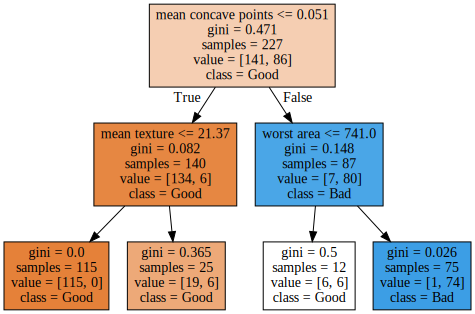

In [42]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dor_graph = f.read()
display(graphviz.Source(dot_graph))

In [45]:
y_pred = tree_final.predict(df_validation_x)
print("Accuracy: {0:3f}\n".format(tree_final.score(df_validation_x, df_validation_y))) #정확도 (0.923)
print("Confusion Matrix:\n{}".format(confusion_matrix(df_validation_y, y_pred))) #Confusion Matrix

Accuracy: 0.923529

Confusion Matrix:
[[110   5]
 [  8  47]]


In [44]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3) #중요변수 확인

,Feature,Importance
7,mean concave points,0.919
23,worst area,0.055
1,mean texture,0.026
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
27,worst concave points,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000


Text(0, 0.5, '설명변수')

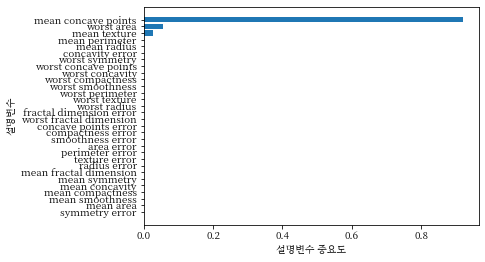

In [46]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [47]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3))) #최적은 0.951 
#0.951과 0.923은 차이가 별로 안남. 

best estimator model: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 40}

best score: 
0.951


In [48]:
df_pred = pd.DataFrame({'prediction':tree_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,171.000000
mean,0.374269
std,0.485355
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [49]:
df_test_y.describe() #실제값

count    171.000000
mean       0.409357
std        0.493159
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무이다

# 숙제 2

In [51]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

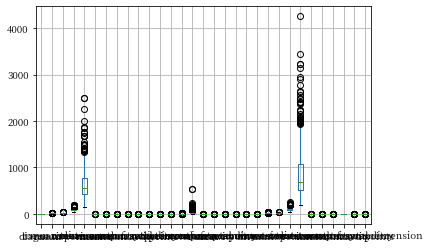

In [53]:
df_raw.boxplot()

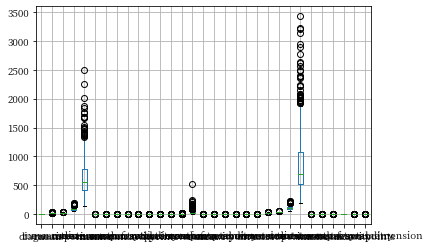

In [54]:
df_raw = df_raw[df_raw["worst area"]<4000] #이상치 제거
df_raw.boxplot()

In [55]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
df_raw_x=df_raw_dummy.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["diagnosis"] #목표변수 설정

In [58]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.6, random_state =1234)
df_validation_x, df_test_x, df_validation_y, df_test_y = train_test_split(df_test_x, df_test_y, test_size = 0.5, random_state =1234)
#train 0.4 test 0.3 validation 0.3으로 분할

print(df_train_x.shape)
print(df_train_y.shape)

print(df_test_x.shape)
print(df_test_y.shape)

print(df_validation_x.shape)
print(df_validation_y.shape)

(227, 30)
(227,)
(171, 30)
(171,)
(170, 30)
(170,)


In [59]:
rf_uncustomized = RandomForestClassifier(random_state =1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set: {:.3f}".format(rf_uncustomized.score(df_validation_x, df_validation_y)))
rf_uncustomized #과적합 되어 있다.

Accuracy on training set: 1.000
Accuracy on validation set: 0.947


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [60]:
train_accuracy = []; validation_accuracy =[]
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["validationAccuracy"] = validation_accuracy

In [61]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,validationAccuracy
0,10,0.996,0.941
1,20,0.996,0.953
2,30,1.000,0.959
3,40,1.000,0.959
4,50,1.000,0.959
5,60,1.000,0.959
6,70,1.000,0.959
7,80,1.000,0.947
8,90,1.000,0.947
9,100,1.000,0.947


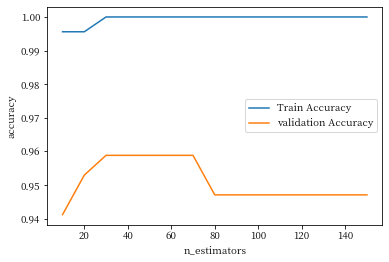

In [62]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()
#n_tree 30선택

In [63]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do no

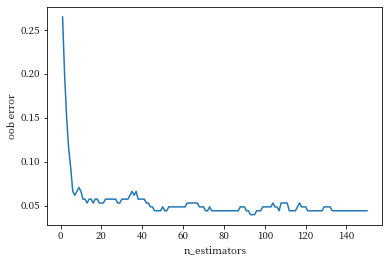

In [65]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")
n_estimators=20 #전 단계를 고려하여 20 선택

In [66]:
train_accuracy = []; validation_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators= 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["validationAccuracy"] = validation_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,validationAccuracy
0,1,0.943,0.941
1,2,0.969,0.941
2,3,0.982,0.953
3,4,0.991,0.953
4,5,0.996,0.947
5,6,1.000,0.953
6,7,1.000,0.947
7,8,1.000,0.947
8,9,1.000,0.947
9,10,1.000,0.947


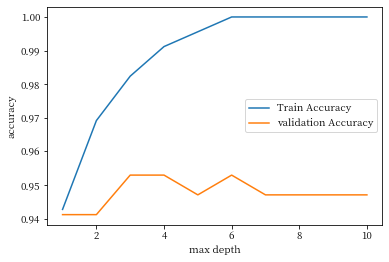

In [67]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

# max_depth 3선택

In [68]:
train_accuracy = []; validation_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth =3, n_estimators =20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["validationAccuracy"] = validation_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,validationAccuracy
0,10,0.978,0.953
1,20,0.978,0.941
2,30,0.978,0.947
3,40,0.978,0.947
4,50,0.965,0.929
5,60,0.960,0.924
6,70,0.960,0.924
7,80,0.960,0.924
8,90,0.960,0.924
9,100,0.960,0.947


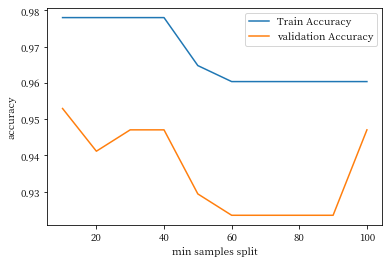

In [69]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()
#split 30 선택

In [70]:
train_accuracy = []; validation_accuracy =[]
para_leaf = [n_leaf* 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth =3, n_estimators = 20, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["validationAccuracy"] = validation_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,validationAccuracy
0,10,0.969,0.947
1,20,0.965,0.953
2,30,0.965,0.953
3,40,0.965,0.947
4,50,0.947,0.906
5,60,0.943,0.894
6,70,0.938,0.924
7,80,0.621,0.676
8,90,0.621,0.676
9,100,0.621,0.676


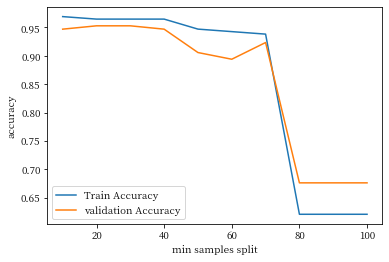

In [71]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()
#leaf 70선택

In [72]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators= 100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_validation_x)
print("Accuracy on training set: {:.3f}\n".format(rf_final.score(df_validation_x, df_validation_y))) #정확도 0.947
print("Accuracy on validation set: {:.3f}\n".format(rf_final.score(df_validation_x, df_validation_y))) #Confusion Matrix
print("Confusion Matrix:\n{}".format(confusion_matrix(df_validation_y, y_pred)))

Accuracy on training set: 0.947

Accuracy on validation set: 0.947

Confusion Matrix:
[[112   3]
 [  6  49]]


In [73]:
v_feaure_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3) #중요변수 확인

,Feature,Importance
22,worst perimeter,0.193
7,mean concave points,0.139
20,worst radius,0.120
27,worst concave points,0.118
23,worst area,0.092
6,mean concavity,0.073
2,mean perimeter,0.073
0,mean radius,0.054
13,area error,0.036
3,mean area,0.029


Text(0, 0.5, '설명변수')

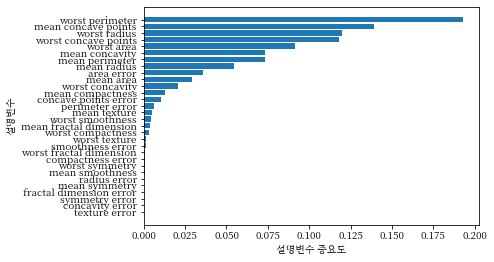

In [74]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [76]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)
param_grid = {"max_depth": para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3))) #최적값 0.956
#0.956과 0.947은 차이가 별로 안남. 

best estimator model: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter: 
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 30}

best score: 
0.956


In [ ]:
df_pred = pd.DataFrame({'prediction':rf_final.predict(df_test_x)}) #예측값
df_pred.describe()

In [ ]:
df_test_y.describe() #실제값

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 랜덤포레스트이다.